In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  # ← changed from AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings

# Load Data


In [46]:
#read csv file
data = pd.read_csv('Lung Cancer Dataset.csv')

# Data Preprocessing

In [47]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [48]:
# Display the first few rows of the dataset to understand its structure
data.head(25)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [49]:
#show the row and column of dataset
data.shape

(5000, 18)

In [50]:
# Check for missing values
print(data.isnull().sum())

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [51]:
# Drop the unnecessary columns
data = data.drop('SMOKING_FAMILY_HISTORY', axis=1)

In [52]:
# Convert the pulmonary disease column to binary format
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

In [53]:
print(data['PULMONARY_DISEASE'].value_counts())

PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [54]:
# Separate features and target variable
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

In [55]:
data.shape

(5000, 17)

In [56]:
# Split the data into training and testing sets with stratification
# stratify=y ensures that the split is stratified based on the class distribution in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
#show records of each features
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.0000


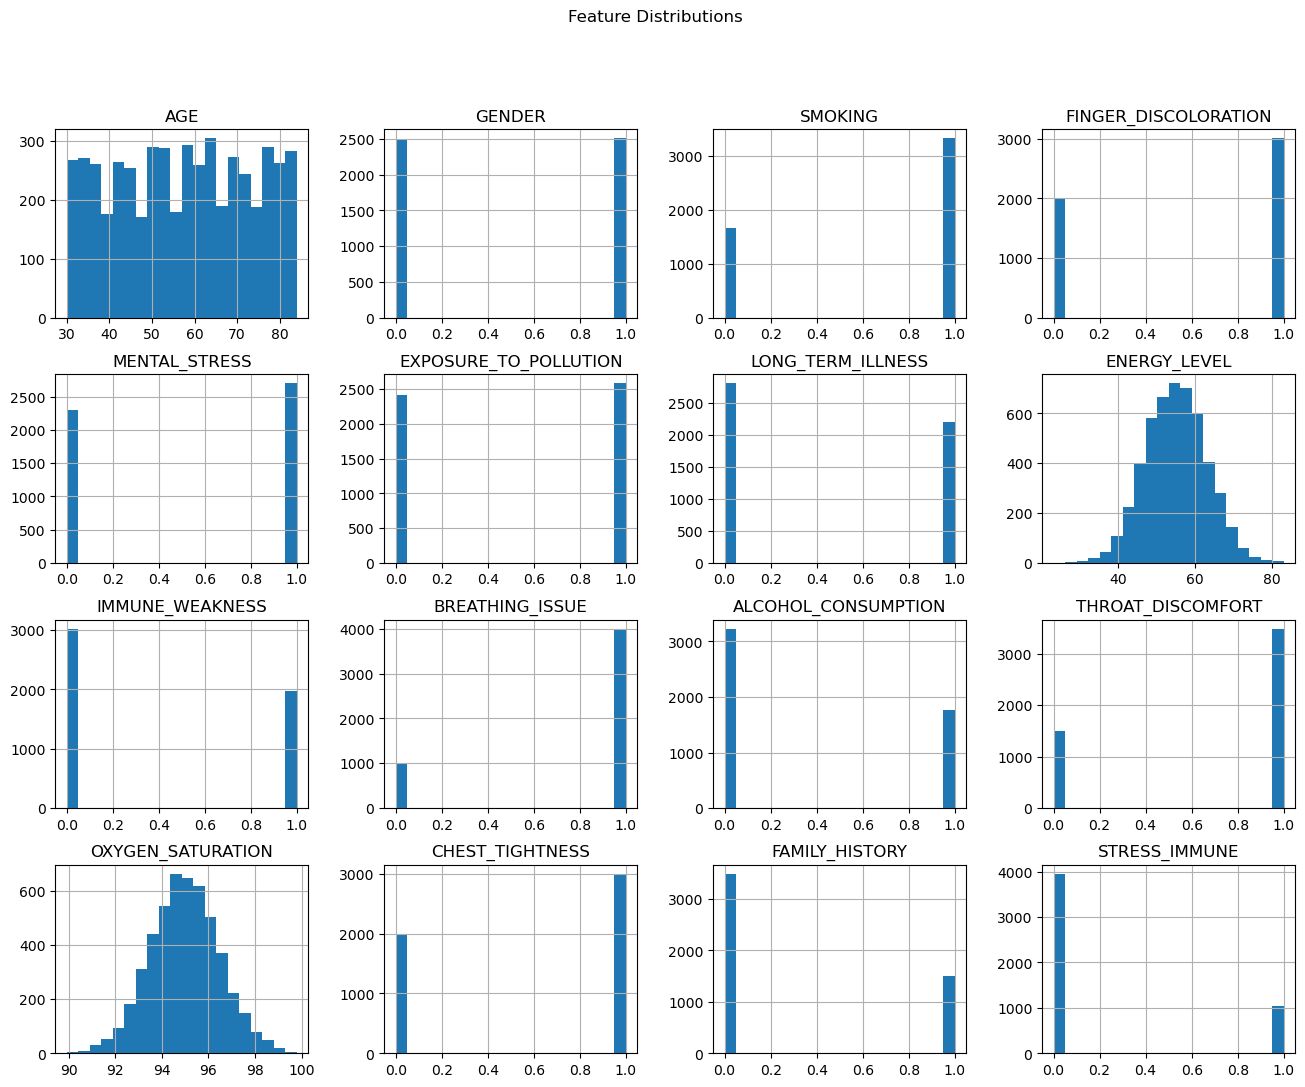

In [59]:
#show the data of features by plotting in graph mode
X.hist(bins=20, figsize=(16, 12))
plt.suptitle("Feature Distributions")
plt.show()

# Model Training

## Gradient Boost Model(Non-Hypertune)

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
y_scores_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_gb))


Training Accuracy: 0.9145
Test Accuracy: 0.901
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       571
           1       0.89      0.88      0.88       429

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



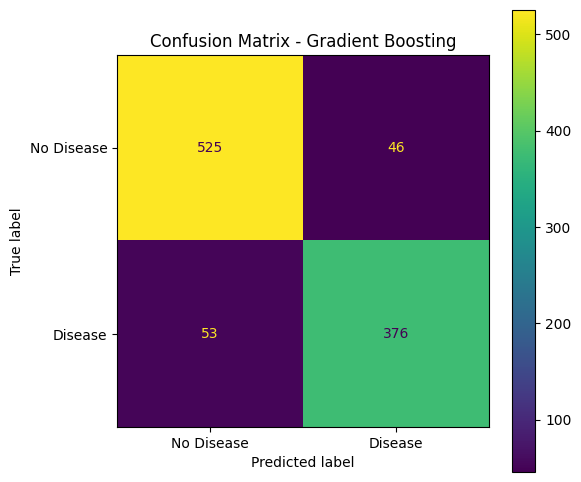

In [31]:
cm_gb = confusion_matrix(y_test, y_test_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['No Disease', 'Disease'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix - Gradient Boosting')
disp.plot(ax=ax)
plt.grid(False)
plt.show()

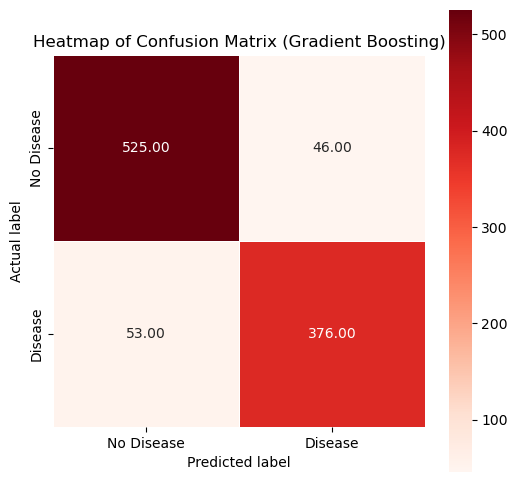

In [62]:
# Plot heatmap for Gradient Boosting
plt.figure(figsize=(6, 6))
sns.heatmap(cm_gb, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


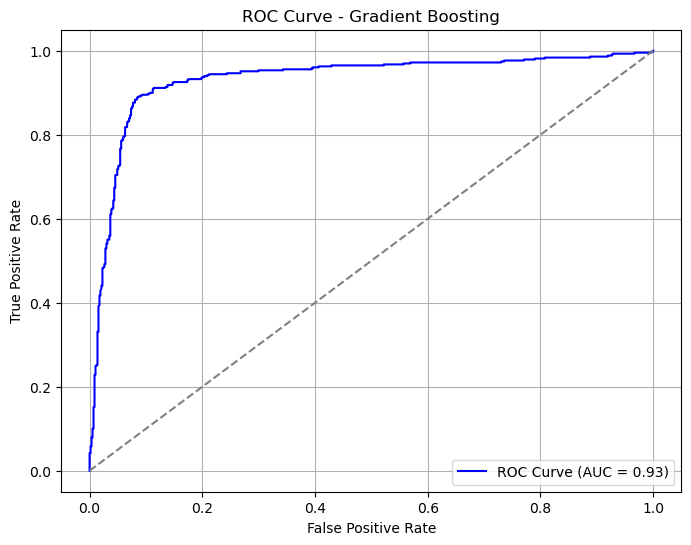

In [63]:
#ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


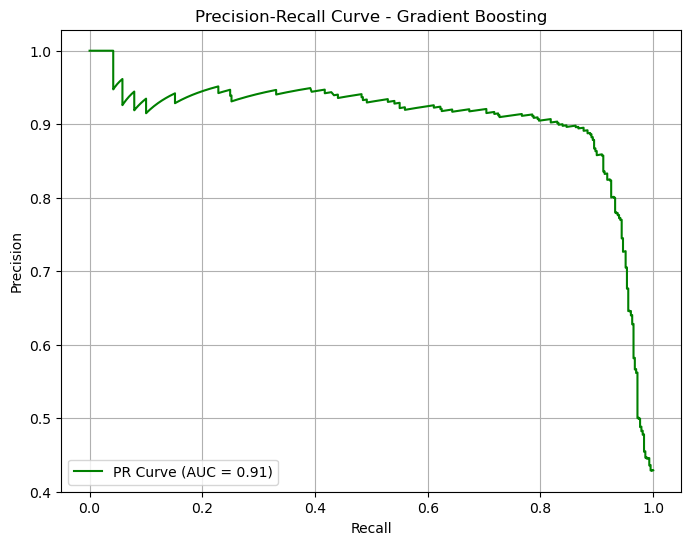

In [64]:
#Precision Call for Gradient Boosting
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_scores_gb)
pr_auc_gb = auc(recall_gb, precision_gb)

plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, color='green', label='PR Curve (AUC = {:.2f})'.format(pr_auc_gb))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [65]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.grid(True)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

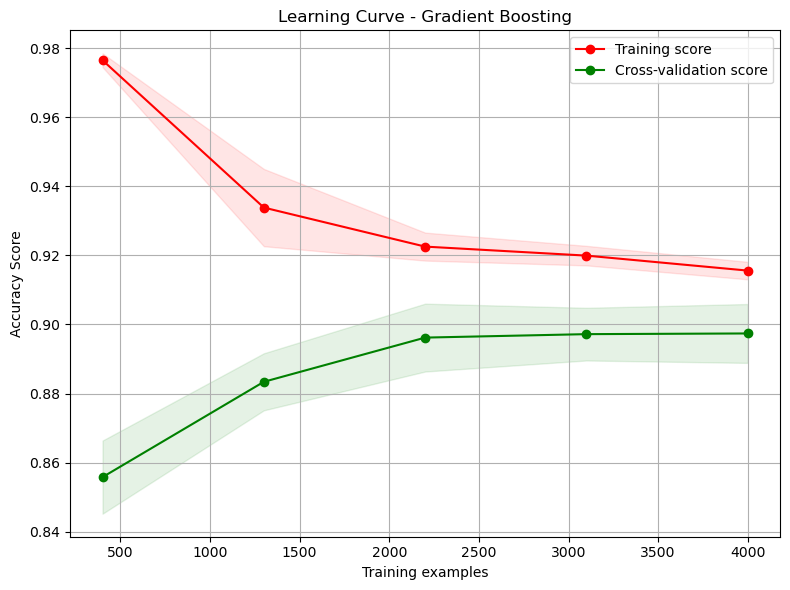

In [66]:
#Plot Learning curve for Gradient Boosting
plot_learning_curve(gb_model, "Learning Curve - Gradient Boosting", X, y, cv=5)

## Gradient Boosting Hypertuning

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Load data
df = pd.read_csv("Lung Cancer Dataset.csv")  # Adjust path if needed
df['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(df['PULMONARY_DISEASE'])  # YES → 1, NO → 0

# Step 2: Split features and target
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define model and parameter grid
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Step 5: Randomized search
search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
search.fit(X_train, y_train)

# Step 6: Get best model and scores
best_model = search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Predict
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Step 8: Print results (formatted like your AdaBoost output)
print("Best parameters for Gradient Boosting:", search.best_params_)
print("Best cross-validation accuracy for Gradient Boosting:", round(cv_scores.mean(), 4))

print("\nGradient Boosting Model (Hypertuning with RandomizedSearchCV)")
print("Training Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
print(classification_report(y_test, y_test_pred))


Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.01}
Best cross-validation accuracy for Gradient Boosting: 0.9008

Gradient Boosting Model (Hypertuning with RandomizedSearchCV)
Training Accuracy: 0.9187
Test Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       571
           1       0.90      0.89      0.89       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



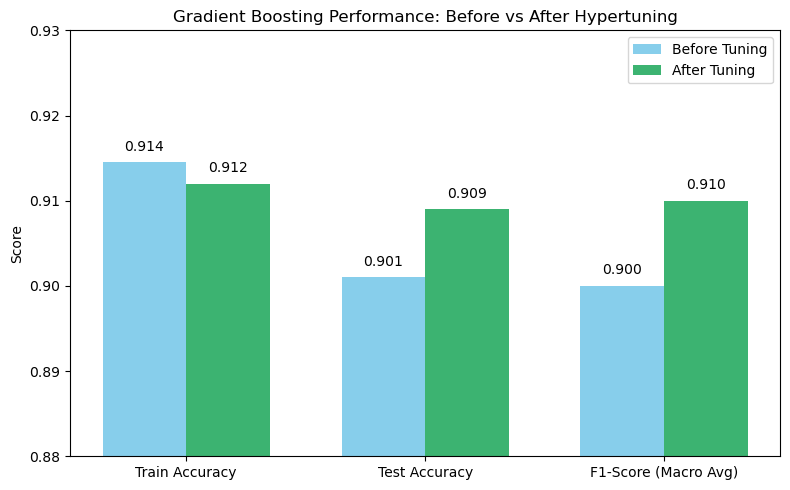

In [68]:
#Bar to view the tune vs untune Gradient Boosting Performance
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for both models
metrics = ['Train Accuracy', 'Test Accuracy', 'F1-Score (Macro Avg)']

# Before tuning scores
no_tune = [0.9145, 0.901, 0.90]

# After hypertuning scores
tuned = [0.912, 0.909, 0.91]

# Set up bar chart position
x = np.arange(len(metrics))
width = 0.35

# Create figure and bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, no_tune, width, label='Before Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, tuned, width, label='After Tuning', color='mediumseagreen')

# Label and format
ax.set_ylabel('Score')
ax.set_title('Gradient Boosting Performance: Before vs After Hypertuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.88, 0.93)
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


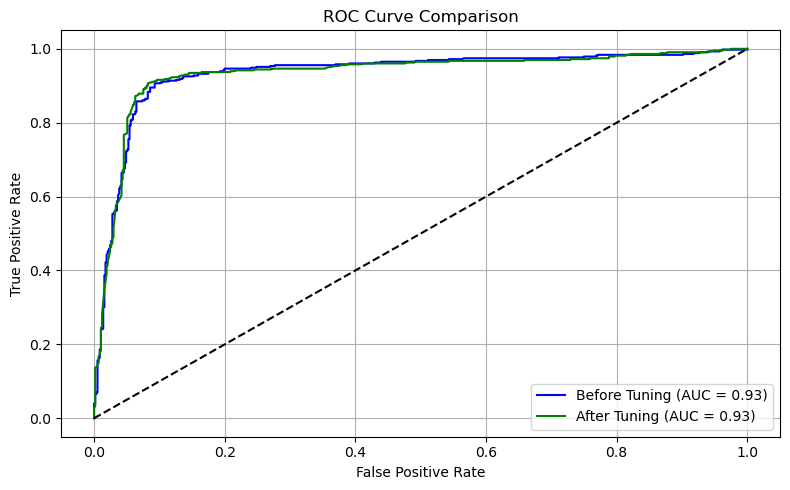

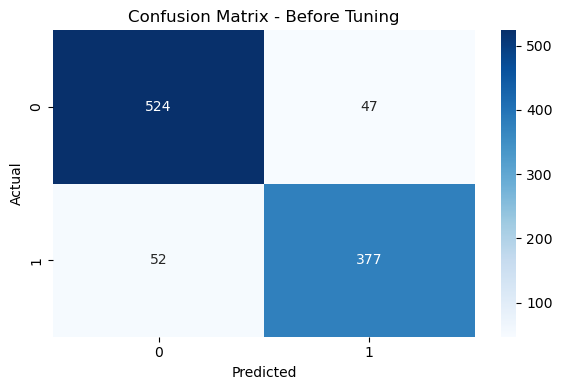

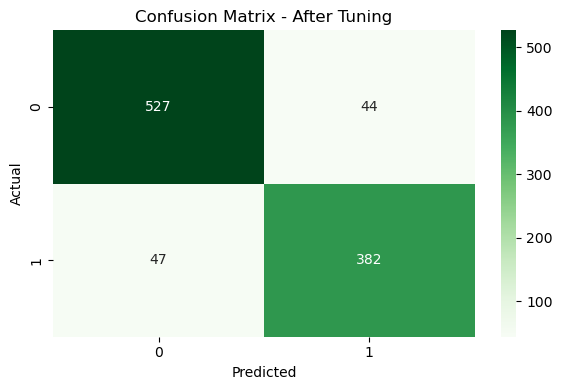

In [ ]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Load and encode the dataset
df = pd.read_csv("Lung Cancer Dataset.csv")  # Update path if needed
df['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(df['PULMONARY_DISEASE'])

# Split features and target
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train no-tuning Gradient Boosting model
gb_no_tune = GradientBoostingClassifier(random_state=42)
gb_no_tune.fit(X_train, y_train)
y_pred_no_tune = gb_no_tune.predict(X_test)
y_scores_no_tune = gb_no_tune.predict_proba(X_test)[:, 1]

# Train hypertuned Gradient Boosting model (using best params found earlier)
gb_tuned = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=50,
    min_samples_split=5,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
gb_tuned.fit(X_train, y_train)
y_pred_tuned = gb_tuned.predict(X_test)
y_scores_tuned = gb_tuned.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr_no_tune, tpr_no_tune, _ = roc_curve(y_test, y_scores_no_tune)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_scores_tuned)
roc_auc_no_tune = auc(fpr_no_tune, tpr_no_tune)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(8, 5))
plt.plot(fpr_no_tune, tpr_no_tune, label=f"Before Tuning (AUC = {roc_auc_no_tune:.2f})", color='blue')
plt.plot(fpr_tuned, tpr_tuned, label=f"After Tuning (AUC = {roc_auc_tuned:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Confusion Matrix - Before Tuning
cm_no_tune = confusion_matrix(y_test, y_pred_no_tune)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_no_tune, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Before Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot Confusion Matrix - After Tuning
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


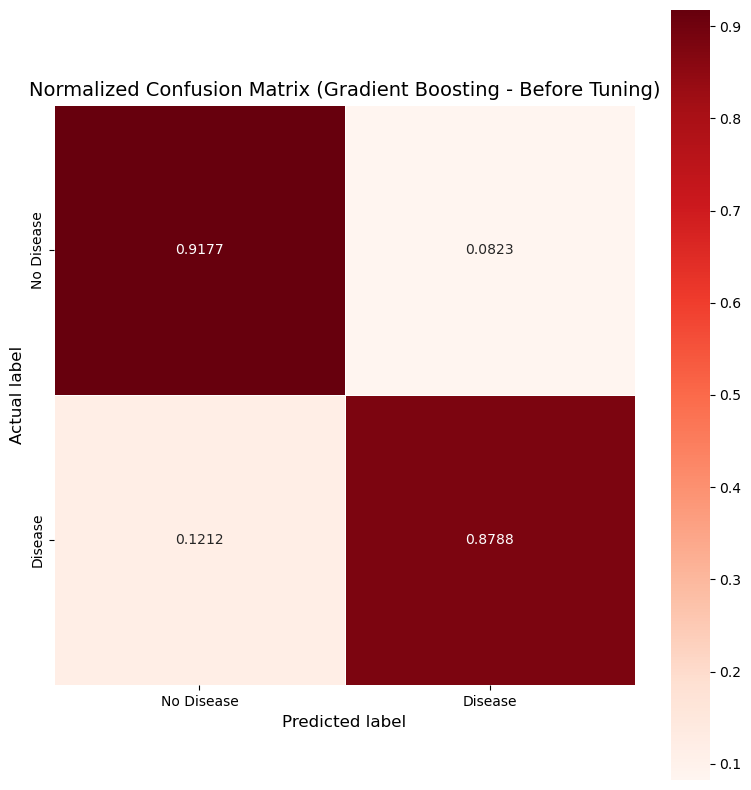

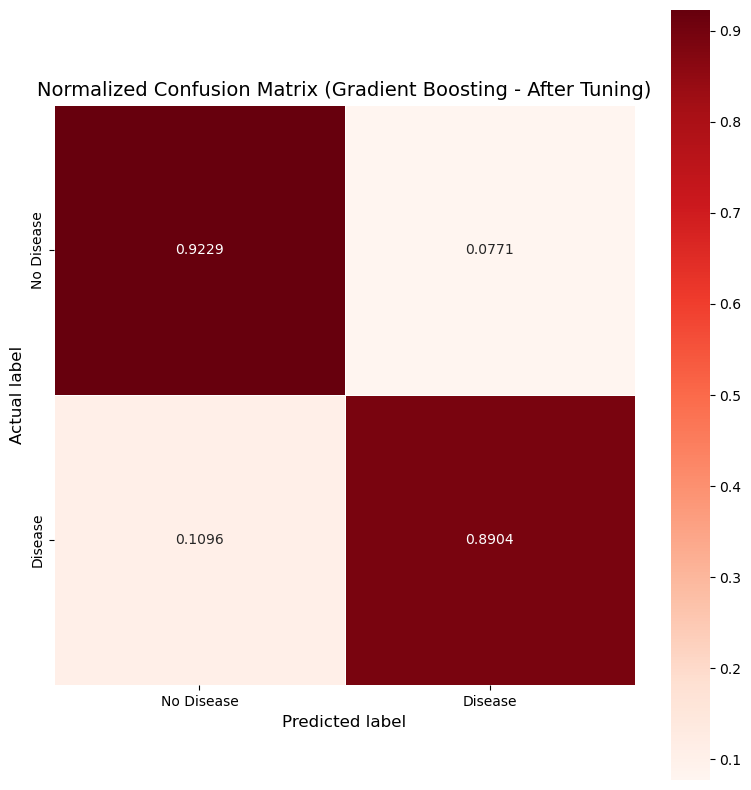

In [70]:
#Heatmap for (before and tune)

# Predictions
y_pred_no_tune = gb_no_tune.predict(X_test)
y_pred_tuned = gb_tuned.predict(X_test)

# Raw confusion matrices
cm_no_tune = confusion_matrix(y_test, y_pred_no_tune)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Normalize
cm_no_tune_norm = cm_no_tune.astype('float') / cm_no_tune.sum(axis=1)[:, np.newaxis]
cm_tuned_norm = cm_tuned.astype('float') / cm_tuned.sum(axis=1)[:, np.newaxis]

# Heatmap - Before Tuning
plt.figure(figsize=(8, 8))
sns.heatmap(cm_no_tune_norm, annot=True, fmt='.4f', linewidths=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Normalized Confusion Matrix (Gradient Boosting - Before Tuning)', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap - After Tuning
plt.figure(figsize=(8, 8))
sns.heatmap(cm_tuned_norm, annot=True, fmt='.4f', linewidths=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Normalized Confusion Matrix (Gradient Boosting - After Tuning)', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.tight_layout()
plt.show()


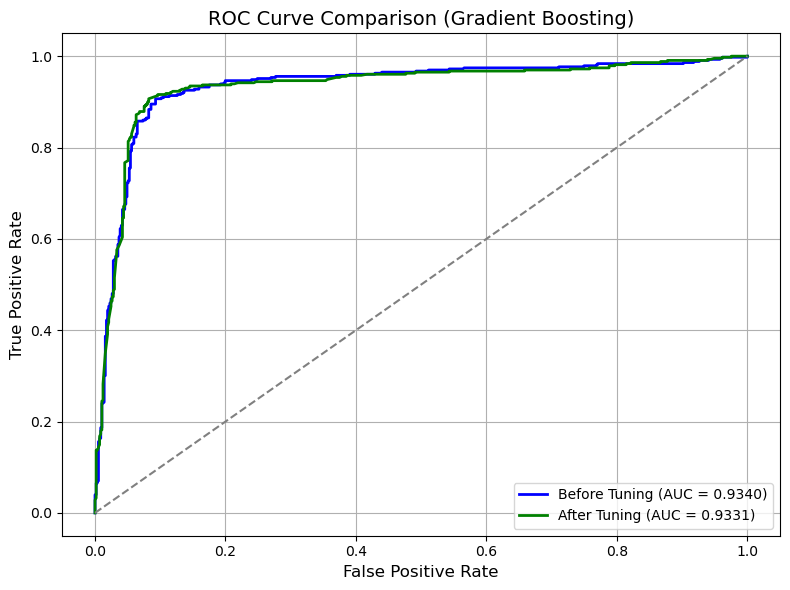

In [71]:
#ROC Curve (Before and tune)

# Get predicted probabilities for class 1
y_scores_no_tune = gb_no_tune.predict_proba(X_test)[:, 1]
y_scores_tuned = gb_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_no_tune, tpr_no_tune, _ = roc_curve(y_test, y_scores_no_tune)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_scores_tuned)
roc_auc_no_tune = auc(fpr_no_tune, tpr_no_tune)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_no_tune, tpr_no_tune, label=f'Before Tuning (AUC = {roc_auc_no_tune:.4f})', color='blue', linewidth=2)
plt.plot(fpr_tuned, tpr_tuned, label=f'After Tuning (AUC = {roc_auc_tuned:.4f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and formatting
plt.title('ROC Curve Comparison (Gradient Boosting)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


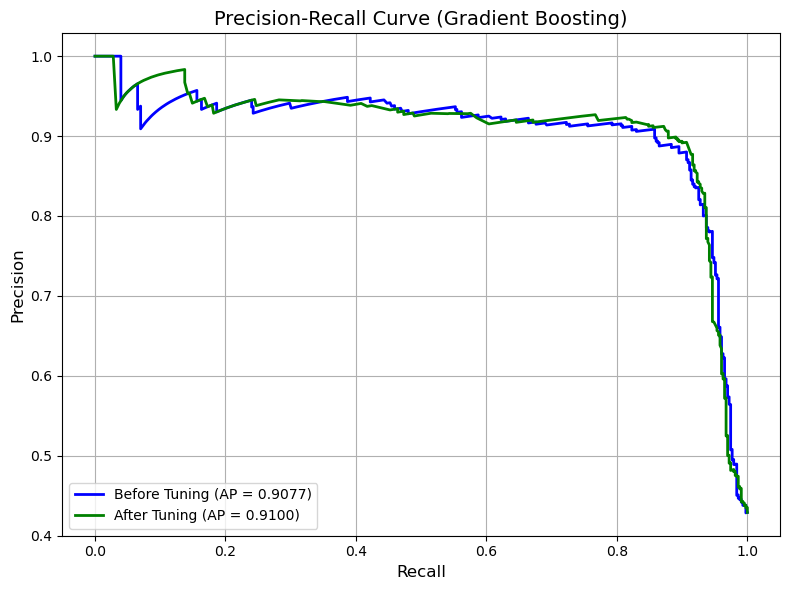

In [72]:
#Precision call for (before and tune)
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for class 1
y_scores_no_tune = gb_no_tune.predict_proba(X_test)[:, 1]
y_scores_tuned = gb_tuned.predict_proba(X_test)[:, 1]

# Compute precision-recall curves
precision_no_tune, recall_no_tune, _ = precision_recall_curve(y_test, y_scores_no_tune)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_scores_tuned)

# Compute average precision scores
ap_no_tune = average_precision_score(y_test, y_scores_no_tune)
ap_tuned = average_precision_score(y_test, y_scores_tuned)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_no_tune, precision_no_tune, label=f'Before Tuning (AP = {ap_no_tune:.4f})', color='blue', linewidth=2)
plt.plot(recall_tuned, precision_tuned, label=f'After Tuning (AP = {ap_tuned:.4f})', color='green', linewidth=2)

# Formatting
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve (Gradient Boosting)', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


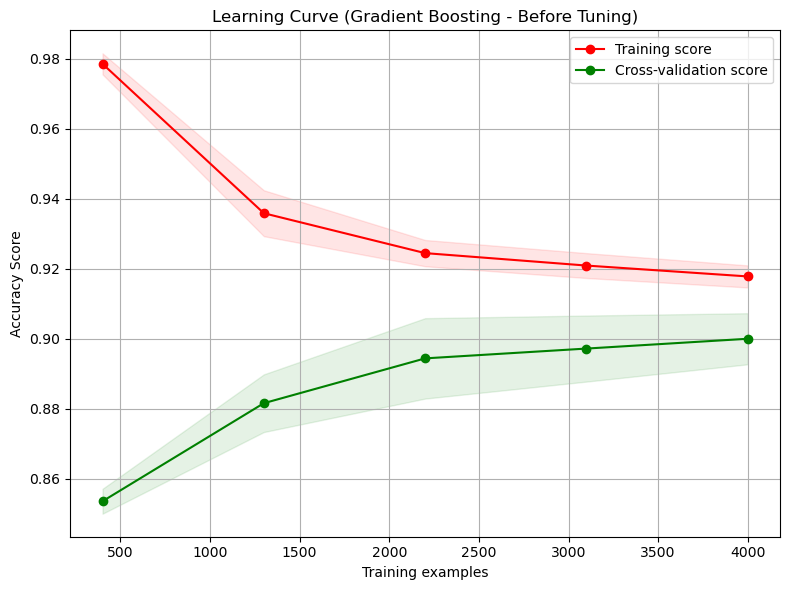

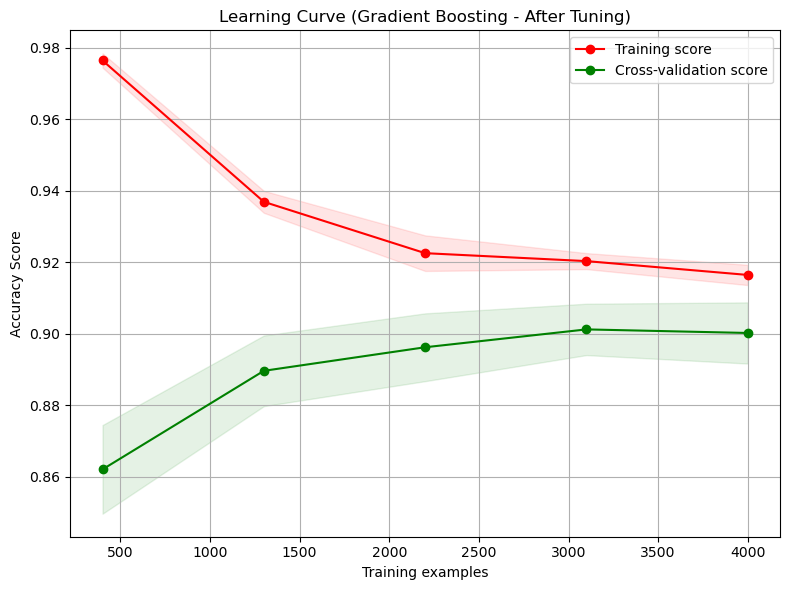

In [73]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Shaded error bands
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Mean accuracy lines
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Use with Gradient Boosting - Before Tuning
plot_learning_curve(
    estimator=gb_no_tune,
    title="Learning Curve (Gradient Boosting - Before Tuning)",
    X=X,
    y=y,
    cv=5,
    n_jobs=-1
)

# Use with Gradient Boosting - After Tuning
plot_learning_curve(
    estimator=gb_tuned,
    title="Learning Curve (Gradient Boosting - After Tuning)",
    X=X,
    y=y,
    cv=5,
    n_jobs=-1
)
